In [1]:
# importing required
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import sys
import random

In [2]:
# loading the test data
Idrid_train = np.load("../../aws_s3/Idrid_224_Crop/X_train.npy")
Idrid_test = np.load("../../aws_s3/Idrid_224_Crop/X_test.npy")
Messidor_train = np.load("../../aws_s3/messidor_224_Crop/X_train.npy")
Messidor_test = np.load("../../aws_s3/messidor_224_Crop/X_test.npy")

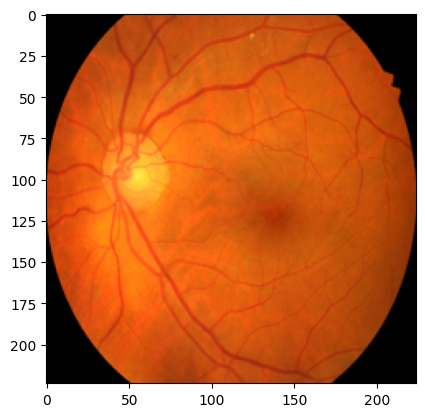

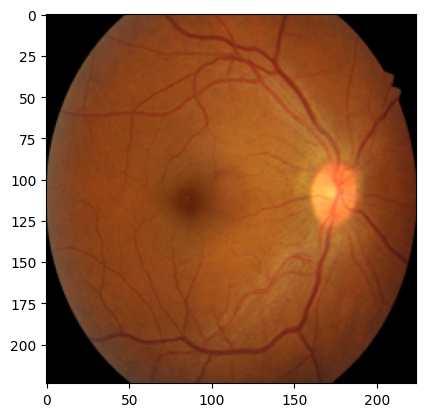

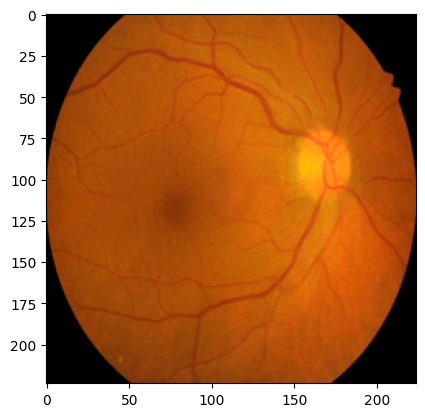

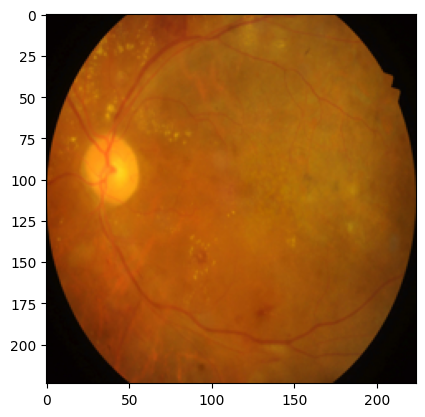

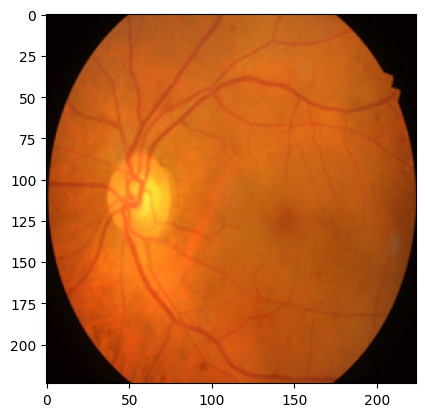

In [3]:
# randomly picking 5 images from each dataset and viewing them
for i in range(5):
    index = random.randint(0, len(Idrid_train))
    img = Idrid_train[index]
    plt.imshow(img)
    plt.show()

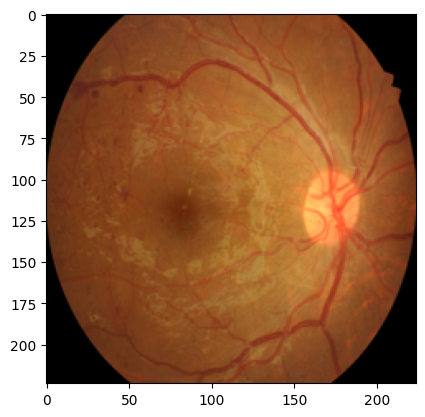

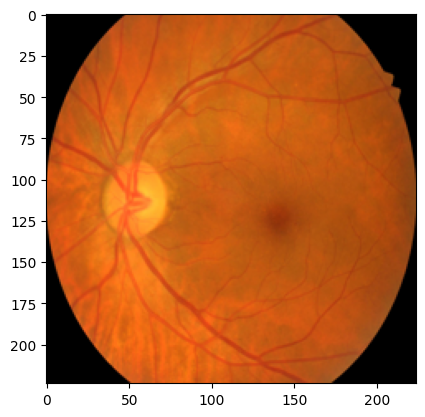

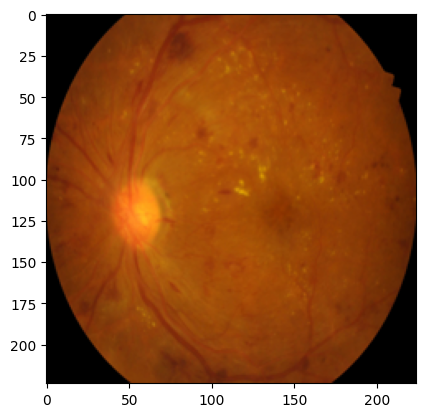

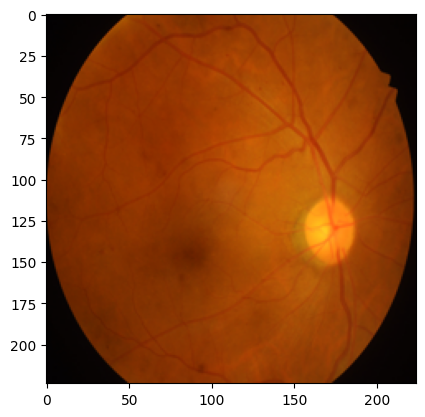

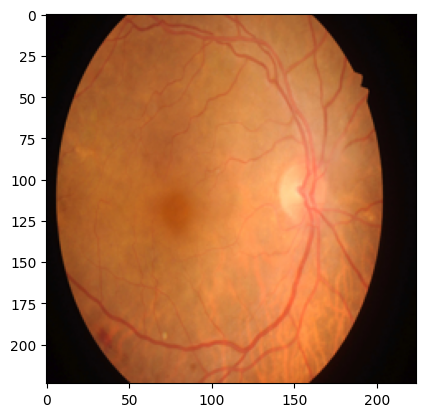

In [4]:
for i in range(5):
    index = random.randint(0, len(Idrid_test))
    img = Idrid_test[index]
    plt.imshow(img)
    plt.show()

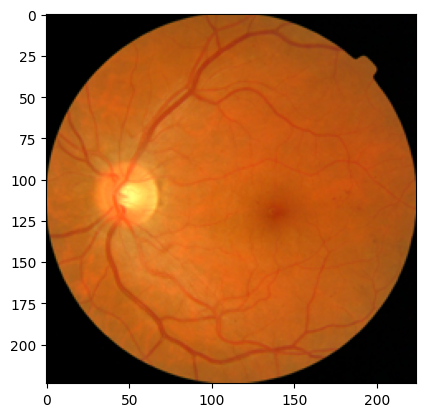

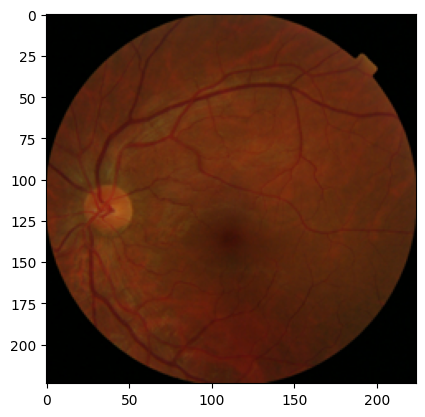

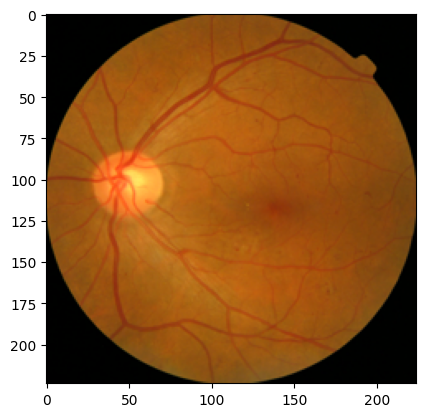

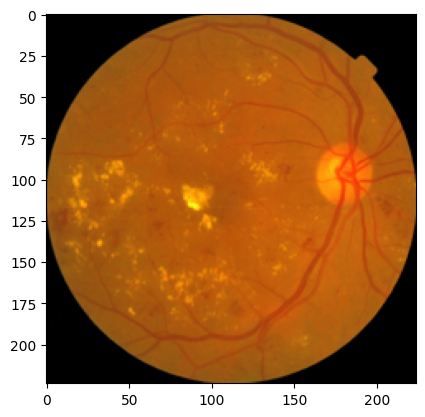

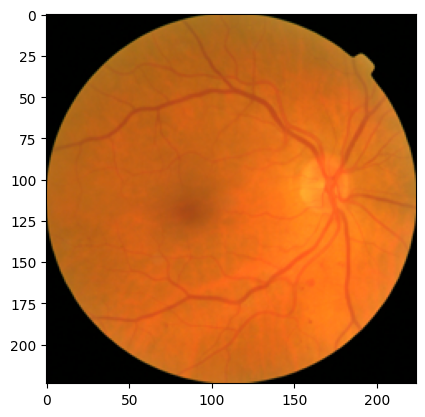

In [5]:
for i in range(5):
    index = random.randint(0, len(Messidor_test))
    img = Messidor_test[index]
    plt.imshow(img)
    plt.show()

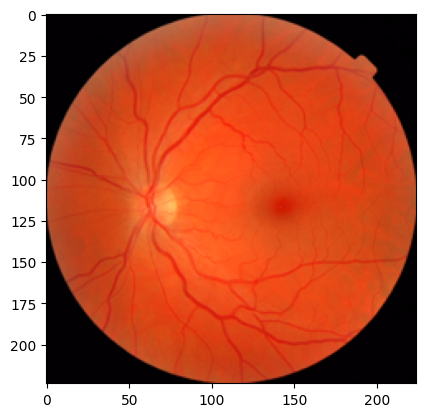

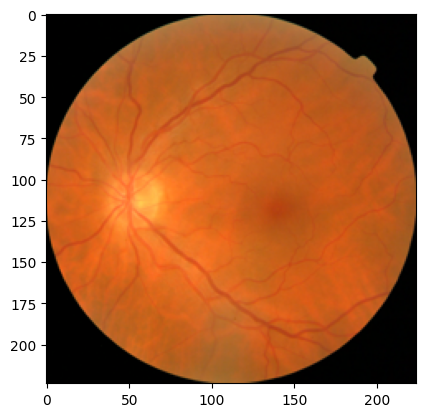

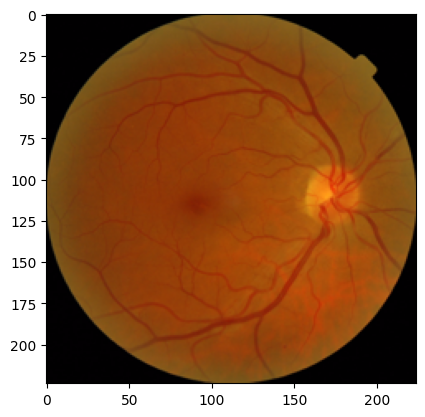

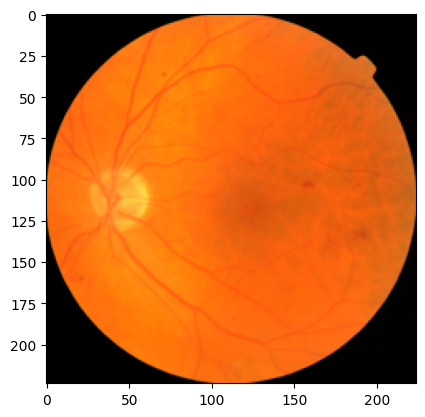

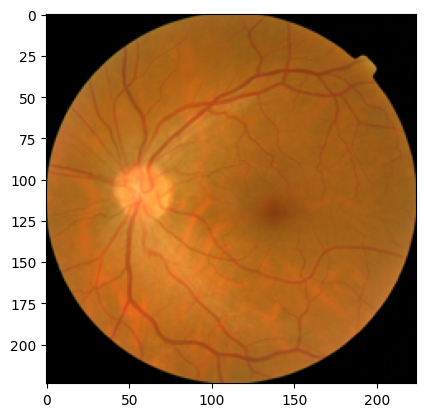

In [6]:
for i in range(5):
    index = random.randint(0, len(Messidor_train))
    img = Messidor_train[index]
    plt.imshow(img)
    plt.show()

In [8]:
import numpy as np
from PIL import Image


def crop_image(img, threshold=15, resize_flag=False, desired_size=(512, 512)):
    # Convert image to numpy array
    img_np = np.array(img)

    # Get the shape of the image
    x_dim = img_np.shape[0]
    y_dim = img_np.shape[1]

    # Sum along the color axis (assuming the color axis is the third dimension)
    pixel_sums = img_np.sum(axis=2)

    # Sum along the x and y axes
    x_arr = pixel_sums.sum(axis=1)
    y_arr = pixel_sums.sum(axis=0)

    # Find the first and last indices where the sum exceeds the threshold
    x_start = np.where(x_arr > threshold * y_dim)[0][0]
    x_end = np.where(x_arr > threshold * y_dim)[0][-1]

    y_start = np.where(y_arr > threshold * x_dim)[0][0]
    y_end = np.where(y_arr > threshold * x_dim)[0][-1]

    # Crop the image
    new_img = img_np[x_start:x_end, y_start:y_end]

    # converting back to image
    new_img = Image.fromarray(new_img)

    # resizing the image
    if resize_flag:
        new_img = new_img.resize(desired_size)

    return new_img

In [13]:
# loading the 3 sample images
img_1 = Image.open("../../02_Data/sample_images/sample_messidor_1.tif")
img_2 = Image.open("../../02_Data/sample_images/sample_messidor_2.tif")
img_3 = Image.open("../../02_Data/sample_images/sample_messidor_3.tif")

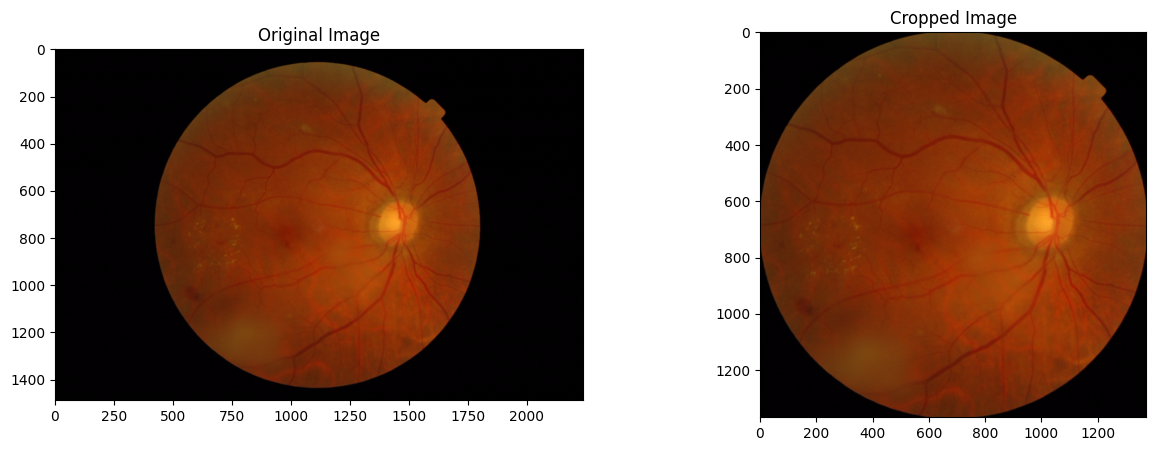

In [14]:
# applying the crop_image function
img_1_crop = crop_image(img_1)

# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_1)
ax[0].set_title(f"Original Image")
ax[1].imshow(img_1_crop)
ax[1].set_title("Cropped Image")
plt.show()

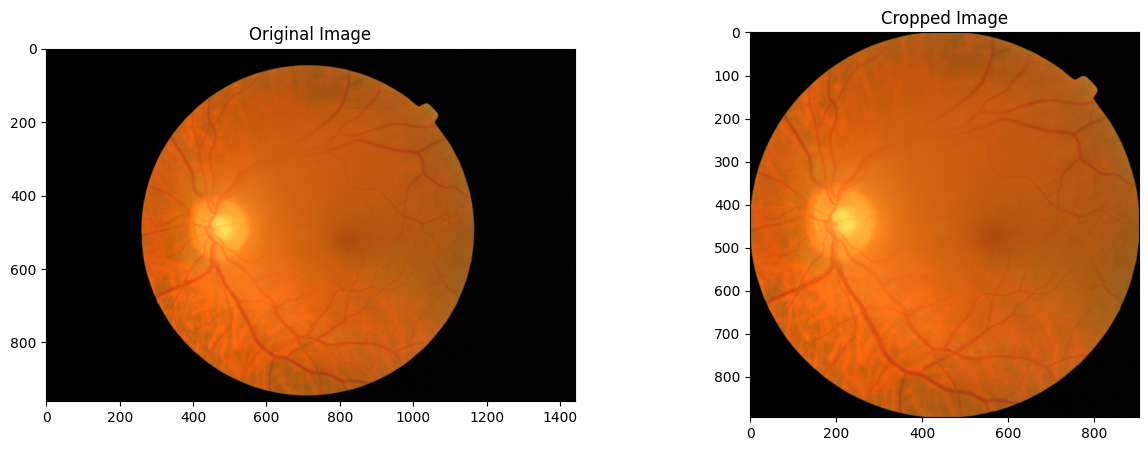

In [15]:
# applying the crop_image function
img_2_crop = crop_image(img_2)

# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_2)
ax[0].set_title(f"Original Image")
ax[1].imshow(img_2_crop)
ax[1].set_title("Cropped Image")
plt.show()

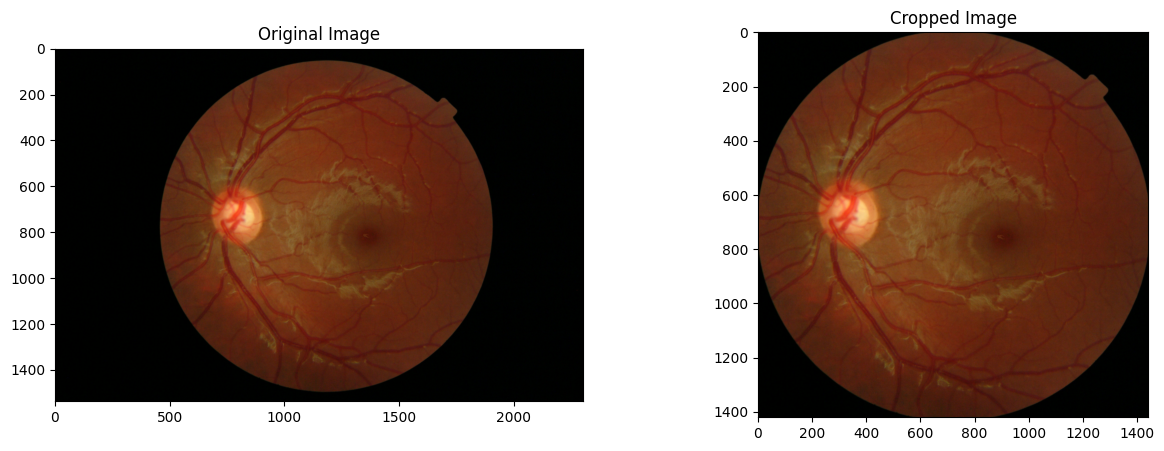

In [16]:
# applying the crop_image function
img_3_crop = crop_image(img_3)

# plotting the original and resized images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(img_3)
ax[0].set_title(f"Original Image")
ax[1].imshow(img_3_crop)
ax[1].set_title("Cropped Image")
plt.show()